# 인디언 당뇨병 예측 문제

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('../ddata/pima-indians-diabetes.data.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
x_data = df.iloc[:,:-1].values
y_data = df.iloc[:,[-1]].values

In [ ]:
# 1. 정규화

In [6]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_data)

In [7]:
x = tf.constant(x_scaled, tf.float32)
y= tf.constant(y_data, tf.float32)

In [8]:
x.shape, y.shape

(TensorShape([768, 8]), TensorShape([768, 1]))

In [9]:
initX =tf.initializers.GlorotUniform()

w = tf.Variable( initX(shape=[x.shape[1],1]))
b = tf.Variable( initX(shape=[1]))

In [10]:
def compute_loss():
    z = tf.matmul(x, w) + b
    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = z) # sum(y*-log(y^) + (1-y)*-log(1-y^))
    cost = tf.reduce_mean(cost_i) # binary cross entropy 값
    return cost

In [11]:
optimizer = Adam(0.3)
for i in range(1000):
    optimizer.minimize(compute_loss, var_list = [w,b])
    if i%100 == 0:
        print(i, "cost: ", compute_loss().numpy())

0 cost:  0.90118533
100 cost:  0.5025411
200 cost:  0.4748522
300 cost:  0.47138715
400 cost:  0.47102222
500 cost:  0.47099447
600 cost:  0.47099316
700 cost:  0.47099307
800 cost:  0.47099307
900 cost:  0.47099313


In [12]:
def hxfn(xdata):
    xd = tf.constant(xdata, tf.float32)
    z = tf.matmul(xd, w) + b
    hx = tf.nn.sigmoid(z)
    return (hx.numpy()>=0.5) + 0 

#### 2. 6,148,72,35,0,33.6,0.627,50 당뇨유무 판별

In [13]:
test = [[6,148,72,35,0,33.6,0.627,50]]
test = scaler.transform(test)
hxfn(test)

array([[1]])

#### 3. confusion matrix, 정확도, f1 score

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [14]:
pred = hxfn(x_scaled)
pred

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [17]:
confusion = confusion_matrix( y_data, pred)
confusion

array([[445,  55],
       [112, 156]], dtype=int64)

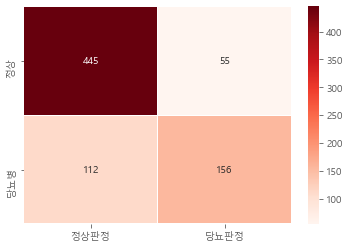

In [18]:
sns.heatmap( confusion, annot=True, fmt='d', linewidths=0.2, cmap='Reds',
           xticklabels=['정상판정','당뇨판정'], yticklabels=['정상','당뇨병'] )
plt.show()

In [19]:
accuracy = accuracy_score(y_data, pred)
accuracy

0.7825520833333334

In [20]:
f1 = f1_score( y_data, pred)
f1

0.651356993736952

# 퀴즈 - early stoping  - tree

In [27]:
df = pd.read_csv('../data/trees.csv')
df.head(3)

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2


## 볼륨 예측
- Girth 8.8, 10.5
- Height 63, 72

In [28]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

### 텐서

In [32]:
x_data = tf.constant(x_scaled, tf.float32)
y_data = tf.constant(y, tf.float32)

In [34]:
w = tf.Variable(tf.random.uniform([2,1]))
b = tf.Variable(tf.random.uniform([1]))

In [35]:
def compute_loss():
    hx = tf.matmul(x_data, w) + b
    cost = tf.reduce_mean((hx - y_data) ** 2)
    return cost

In [36]:
optimizer = Adam(0.1)
patience = 100
pcnt = 0
hist_cost = []
min_delta = 0.001

for epoch in range(3000):
    optimizer.minimize(compute_loss, var_list = [w, b])
    cost = compute_loss().numpy()
    hist_cost.append( cost )
    print(epoch, "cost = ", cost)
    if epoch > 0:
        if hist_cost[epoch - 1] - hist_cost[epoch] > min_delta:
            pcnt = 0
        else:
            pcnt += 1
        if pcnt > patience:
            print("early stopping")
            break
        else:
            continue

0 cost =  1134.7192
1 cost =  1121.9583
2 cost =  1109.2803
3 cost =  1096.6868
4 cost =  1084.1787
5 cost =  1071.7579
6 cost =  1059.4253
7 cost =  1047.182
8 cost =  1035.0292
9 cost =  1022.9682
10 cost =  1010.99976
11 cost =  999.125
12 cost =  987.34503
13 cost =  975.6604
14 cost =  964.0722
15 cost =  952.58124
16 cost =  941.188
17 cost =  929.8932
18 cost =  918.6976
19 cost =  907.6017
20 cost =  896.6059
21 cost =  885.7107
22 cost =  874.9165
23 cost =  864.2235
24 cost =  853.63214
25 cost =  843.1425
26 cost =  832.7548
27 cost =  822.46924
28 cost =  812.28577
29 cost =  802.2045
30 cost =  792.22534
31 cost =  782.34827
32 cost =  772.5732
33 cost =  762.9
34 cost =  753.3284
35 cost =  743.85834
36 cost =  734.48956
37 cost =  725.2215
38 cost =  716.05426
39 cost =  706.9871
40 cost =  698.02
41 cost =  689.15247
42 cost =  680.384
43 cost =  671.7141
44 cost =  663.1424
45 cost =  654.66846
46 cost =  646.29175
47 cost =  638.0118
48 cost =  629.828
49 cost =  621.

439 cost =  78.48926
440 cost =  78.39009
441 cost =  78.29097
442 cost =  78.19187
443 cost =  78.09281
444 cost =  77.9938
445 cost =  77.894806
446 cost =  77.79588
447 cost =  77.69696
448 cost =  77.5981
449 cost =  77.49927
450 cost =  77.40047
451 cost =  77.30171
452 cost =  77.202995
453 cost =  77.10432
454 cost =  77.00569
455 cost =  76.90708
456 cost =  76.808525
457 cost =  76.71
458 cost =  76.61151
459 cost =  76.51308
460 cost =  76.41469
461 cost =  76.31633
462 cost =  76.217995
463 cost =  76.11971
464 cost =  76.02147
465 cost =  75.92328
466 cost =  75.825134
467 cost =  75.72701
468 cost =  75.62893
469 cost =  75.53091
470 cost =  75.43293
471 cost =  75.33498
472 cost =  75.237076
473 cost =  75.13921
474 cost =  75.04141
475 cost =  74.94364
476 cost =  74.845924
477 cost =  74.74824
478 cost =  74.650604
479 cost =  74.553024
480 cost =  74.45548
481 cost =  74.35799
482 cost =  74.26053
483 cost =  74.16313
484 cost =  74.06577
485 cost =  73.968475
486 cost

902 cost =  40.297104
903 cost =  40.236477
904 cost =  40.175983
905 cost =  40.115566
906 cost =  40.055256
907 cost =  39.995045
908 cost =  39.93494
909 cost =  39.874924
910 cost =  39.815014
911 cost =  39.75521
912 cost =  39.695507
913 cost =  39.635895
914 cost =  39.57639
915 cost =  39.51699
916 cost =  39.457676
917 cost =  39.398468
918 cost =  39.33937
919 cost =  39.28036
920 cost =  39.22146
921 cost =  39.162647
922 cost =  39.103947
923 cost =  39.045334
924 cost =  38.98684
925 cost =  38.928425
926 cost =  38.870117
927 cost =  38.811913
928 cost =  38.753807
929 cost =  38.695793
930 cost =  38.637886
931 cost =  38.580082
932 cost =  38.522358
933 cost =  38.464764
934 cost =  38.40725
935 cost =  38.349842
936 cost =  38.292526
937 cost =  38.235317
938 cost =  38.178215
939 cost =  38.12119
940 cost =  38.064266
941 cost =  38.007465
942 cost =  37.95074
943 cost =  37.894115
944 cost =  37.837605
945 cost =  37.781178
946 cost =  37.724857
947 cost =  37.66863


1270 cost =  24.19846
1271 cost =  24.169529
1272 cost =  24.140669
1273 cost =  24.111874
1274 cost =  24.083145
1275 cost =  24.054483
1276 cost =  24.025883
1277 cost =  23.99735
1278 cost =  23.968893
1279 cost =  23.940496
1280 cost =  23.91217
1281 cost =  23.883902
1282 cost =  23.855701
1283 cost =  23.827574
1284 cost =  23.799507
1285 cost =  23.771505
1286 cost =  23.74357
1287 cost =  23.7157
1288 cost =  23.687893
1289 cost =  23.66016
1290 cost =  23.632484
1291 cost =  23.604876
1292 cost =  23.57733
1293 cost =  23.549845
1294 cost =  23.522429
1295 cost =  23.49508
1296 cost =  23.46779
1297 cost =  23.440569
1298 cost =  23.413408
1299 cost =  23.386316
1300 cost =  23.359291
1301 cost =  23.332317
1302 cost =  23.305416
1303 cost =  23.278574
1304 cost =  23.251806
1305 cost =  23.225094
1306 cost =  23.198439
1307 cost =  23.171854
1308 cost =  23.145338
1309 cost =  23.118872
1310 cost =  23.09247
1311 cost =  23.066141
1312 cost =  23.039864
1313 cost =  23.013657

1683 cost =  16.726152
1684 cost =  16.716238
1685 cost =  16.706354
1686 cost =  16.696505
1687 cost =  16.686678
1688 cost =  16.676874
1689 cost =  16.667097
1690 cost =  16.65735
1691 cost =  16.647633
1692 cost =  16.637949
1693 cost =  16.628286
1694 cost =  16.618656
1695 cost =  16.609043
1696 cost =  16.599468
1697 cost =  16.589914
1698 cost =  16.580389
1699 cost =  16.570896
1700 cost =  16.561415
1701 cost =  16.551977
1702 cost =  16.542559
1703 cost =  16.53317
1704 cost =  16.523804
1705 cost =  16.514465
1706 cost =  16.505163
1707 cost =  16.495884
1708 cost =  16.486626
1709 cost =  16.477392
1710 cost =  16.468191
1711 cost =  16.459011
1712 cost =  16.449856
1713 cost =  16.440739
1714 cost =  16.431631
1715 cost =  16.422558
1716 cost =  16.413515
1717 cost =  16.404493
1718 cost =  16.395502
1719 cost =  16.38653
1720 cost =  16.377586
1721 cost =  16.368671
1722 cost =  16.35978
1723 cost =  16.350912
1724 cost =  16.342072
1725 cost =  16.333256
1726 cost =  16

2060 cost =  14.4712305
2061 cost =  14.4680805
2062 cost =  14.46495
2063 cost =  14.461817
2064 cost =  14.458709
2065 cost =  14.455594
2066 cost =  14.452504
2067 cost =  14.449415
2068 cost =  14.44634
2069 cost =  14.443273
2070 cost =  14.440221
2071 cost =  14.437177
2072 cost =  14.43414
2073 cost =  14.431113
2074 cost =  14.428093
2075 cost =  14.42509
2076 cost =  14.422095
2077 cost =  14.419109
2078 cost =  14.41613
2079 cost =  14.413159
2080 cost =  14.410207
2081 cost =  14.407258
2082 cost =  14.404325
2083 cost =  14.401393
2084 cost =  14.398474
2085 cost =  14.395568
2086 cost =  14.392667
2087 cost =  14.389774
2088 cost =  14.386894
2089 cost =  14.384026
2090 cost =  14.381164
2091 cost =  14.378314
2092 cost =  14.375466
2093 cost =  14.37264
2094 cost =  14.369812
2095 cost =  14.366999
2096 cost =  14.364193
2097 cost =  14.361398
2098 cost =  14.358607
2099 cost =  14.355829
2100 cost =  14.353063
2101 cost =  14.3503
2102 cost =  14.347552
2103 cost =  14.3

2463 cost =  13.782046
2464 cost =  13.781291
2465 cost =  13.780546
2466 cost =  13.7797985
2467 cost =  13.779057
2468 cost =  13.7783165
2469 cost =  13.777585
2470 cost =  13.776847
2471 cost =  13.776112
2472 cost =  13.775391
2473 cost =  13.774664
2474 cost =  13.773939
2475 cost =  13.773221
2476 cost =  13.772499
2477 cost =  13.77179
2478 cost =  13.771083
2479 cost =  13.770368
2480 cost =  13.769666
2481 cost =  13.76896
2482 cost =  13.768261
2483 cost =  13.767567
2484 cost =  13.7668705
2485 cost =  13.766181
2486 cost =  13.765487
2487 cost =  13.764802
2488 cost =  13.764119
2489 cost =  13.763436
early stopping


In [37]:
def hxfn(xdata):
    xdata = tf.constant(xdata, tf.float32)
    hx = tf.matmul(xdata, w) + b
    return hx.numpy()

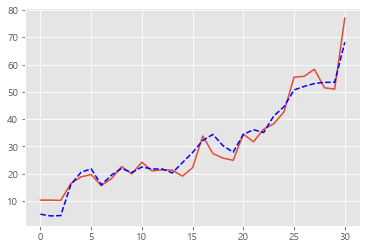

In [39]:
plt.plot( y)
plt.plot( hxfn( x_scaled) ,'b--')
plt.show()

예측


In [41]:
hxfn(   scaler.transform([[8.8, 63], [10.5, 72]])     )

array([[ 4.6236715],
       [15.999303 ]], dtype=float32)

## 케라스

In [42]:
w = tf.Variable(tf.random.uniform([2,1]))
b = tf.Variable(tf.random.uniform([1]))

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
dense = Dense( units = 1, input_dim = 2)
model = Sequential([dense])
model.compile(loss = 'mse', optimizer = Adam(0.1))
earlyStop = EarlyStopping(monitor = 'loss', min_delta = 0.01, patience = 100)
h = model.fit(x_data, y_data, epochs = 15000, callbacks = [earlyStop])

Epoch 1/15000
1/1 [==============================] - 0s 169ms/step - loss: 1172.8810
Epoch 2/15000
1/1 [==============================] - 0s 12ms/step - loss: 1159.9072
Epoch 3/15000
1/1 [==============================] - 0s 2ms/step - loss: 1147.0156
Epoch 4/15000
1/1 [==============================] - 0s 2ms/step - loss: 1134.2068
Epoch 5/15000
1/1 [==============================] - 0s 848us/step - loss: 1121.4825
Epoch 6/15000
1/1 [==============================] - 0s 2ms/step - loss: 1108.8439
Epoch 7/15000
1/1 [==============================] - 0s 2ms/step - loss: 1096.2922
Epoch 8/15000
1/1 [==============================] - 0s 997us/step - loss: 1083.8289
Epoch 9/15000
1/1 [==============================] - 0s 997us/step - loss: 1071.4547
Epoch 10/15000
1/1 [==============================] - 0s 2ms/step - loss: 1059.1714
Epoch 11/15000
1/1 [==============================] - 0s 997us/step - loss: 1046.9796
Epoch 12/15000
1/1 [==============================] - 0s 997us/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 350.9321
Epoch 99/15000
1/1 [==============================] - 0s 997us/step - loss: 346.5575
Epoch 100/15000
1/1 [==============================] - 0s 2ms/step - loss: 342.2463
Epoch 101/15000
1/1 [==============================] - 0s 998us/step - loss: 337.9980
Epoch 102/15000
1/1 [==============================] - 0s 997us/step - loss: 333.8116
Epoch 103/15000
1/1 [==============================] - 0s 1ms/step - loss: 329.6868
Epoch 104/15000
1/1 [==============================] - 0s 2ms/step - loss: 325.6229
Epoch 105/15000
1/1 [==============================] - 0s 2ms/step - loss: 321.6190
Epoch 106/15000
1/1 [==============================] - 0s 2ms/step - loss: 317.6747
Epoch 107/15000
1/1 [==============================] - 0s 997us/step - loss: 313.7892
Epoch 108/15000
1/1 [==============================] - 0s 997us/step - loss: 309.9621
Epoch 109/15000
1/1 [==============================] - 0s 2ms/step - loss: 306.1924

1/1 [==============================] - 0s 997us/step - loss: 136.2641
Epoch 195/15000
1/1 [==============================] - 0s 998us/step - loss: 135.4372
Epoch 196/15000
1/1 [==============================] - 0s 997us/step - loss: 134.6262
Epoch 197/15000
1/1 [==============================] - 0s 2ms/step - loss: 133.8310
Epoch 198/15000
1/1 [==============================] - 0s 2ms/step - loss: 133.0512
Epoch 199/15000
1/1 [==============================] - 0s 998us/step - loss: 132.2865
Epoch 200/15000
1/1 [==============================] - 0s 1ms/step - loss: 131.5367
Epoch 201/15000
1/1 [==============================] - 0s 997us/step - loss: 130.8014
Epoch 202/15000
1/1 [==============================] - 0s 996us/step - loss: 130.0805
Epoch 203/15000
1/1 [==============================] - 0s 2ms/step - loss: 129.3735
Epoch 204/15000
1/1 [==============================] - 0s 2ms/step - loss: 128.6803
Epoch 205/15000
1/1 [==============================] - 0s 2ms/step - loss: 128.0

1/1 [==============================] - 0s 994us/step - loss: 99.2578
Epoch 291/15000
1/1 [==============================] - 0s 2ms/step - loss: 99.0978
Epoch 292/15000
1/1 [==============================] - 0s 6ms/step - loss: 98.9395
Epoch 293/15000
1/1 [==============================] - 0s 3ms/step - loss: 98.7829
Epoch 294/15000
1/1 [==============================] - 0s 2ms/step - loss: 98.6279
Epoch 295/15000
1/1 [==============================] - 0s 2ms/step - loss: 98.4746
Epoch 296/15000
1/1 [==============================] - 0s 2ms/step - loss: 98.3227
Epoch 297/15000
1/1 [==============================] - 0s 2ms/step - loss: 98.1724
Epoch 298/15000
1/1 [==============================] - 0s 3ms/step - loss: 98.0235
Epoch 299/15000
1/1 [==============================] - 0s 997us/step - loss: 97.8761
Epoch 300/15000
1/1 [==============================] - 0s 2ms/step - loss: 97.7300
Epoch 301/15000
1/1 [==============================] - 0s 2ms/step - loss: 97.5852
Epoch 302/15000


1/1 [==============================] - 0s 997us/step - loss: 87.4611
Epoch 389/15000
1/1 [==============================] - 0s 997us/step - loss: 87.3563
Epoch 390/15000
1/1 [==============================] - 0s 996us/step - loss: 87.2516
Epoch 391/15000
1/1 [==============================] - 0s 2ms/step - loss: 87.1470
Epoch 392/15000
1/1 [==============================] - 0s 3ms/step - loss: 87.0425
Epoch 393/15000
1/1 [==============================] - 0s 2ms/step - loss: 86.9380
Epoch 394/15000
1/1 [==============================] - 0s 998us/step - loss: 86.8336
Epoch 395/15000
1/1 [==============================] - 0s 2ms/step - loss: 86.7293
Epoch 396/15000
1/1 [==============================] - 0s 996us/step - loss: 86.6251
Epoch 397/15000
1/1 [==============================] - 0s 2ms/step - loss: 86.5209
Epoch 398/15000
1/1 [==============================] - 0s 3ms/step - loss: 86.4167
Epoch 399/15000
1/1 [==============================] - 0s 997us/step - loss: 86.3127
Epoch 40

1/1 [==============================] - 0s 996us/step - loss: 77.4234
Epoch 487/15000
1/1 [==============================] - 0s 2ms/step - loss: 77.3230
Epoch 488/15000
1/1 [==============================] - 0s 2ms/step - loss: 77.2226
Epoch 489/15000
1/1 [==============================] - 0s 997us/step - loss: 77.1223
Epoch 490/15000
1/1 [==============================] - 0s 2ms/step - loss: 77.0221
Epoch 491/15000
1/1 [==============================] - 0s 2ms/step - loss: 76.9219
Epoch 492/15000
1/1 [==============================] - 0s 1ms/step - loss: 76.8217
Epoch 493/15000
1/1 [==============================] - 0s 2ms/step - loss: 76.7215
Epoch 494/15000
1/1 [==============================] - 0s 997us/step - loss: 76.6215
Epoch 495/15000
1/1 [==============================] - 0s 3ms/step - loss: 76.5215
Epoch 496/15000
1/1 [==============================] - 0s 1ms/step - loss: 76.4215
Epoch 497/15000
1/1 [==============================] - 0s 2ms/step - loss: 76.3215
Epoch 498/1500

1/1 [==============================] - 0s 2ms/step - loss: 67.8503
Epoch 585/15000
1/1 [==============================] - 0s 2ms/step - loss: 67.7559
Epoch 586/15000
1/1 [==============================] - 0s 2ms/step - loss: 67.6615
Epoch 587/15000
1/1 [==============================] - 0s 2ms/step - loss: 67.5672
Epoch 588/15000
1/1 [==============================] - 0s 997us/step - loss: 67.4731
Epoch 589/15000
1/1 [==============================] - 0s 2ms/step - loss: 67.3789
Epoch 590/15000
1/1 [==============================] - 0s 996us/step - loss: 67.2849
Epoch 591/15000
1/1 [==============================] - 0s 2ms/step - loss: 67.1909
Epoch 592/15000
1/1 [==============================] - 0s 2ms/step - loss: 67.0970
Epoch 593/15000
1/1 [==============================] - 0s 2ms/step - loss: 67.0032
Epoch 594/15000
1/1 [==============================] - 0s 2ms/step - loss: 66.9094
Epoch 595/15000
1/1 [==============================] - 0s 997us/step - loss: 66.8158
Epoch 596/1500

1/1 [==============================] - 0s 2ms/step - loss: 59.0719
Epoch 682/15000
1/1 [==============================] - 0s 2ms/step - loss: 58.9856
Epoch 683/15000
1/1 [==============================] - 0s 998us/step - loss: 58.8996
Epoch 684/15000
1/1 [==============================] - 0s 2ms/step - loss: 58.8136
Epoch 685/15000
1/1 [==============================] - 0s 2ms/step - loss: 58.7276
Epoch 686/15000
1/1 [==============================] - 0s 998us/step - loss: 58.6418
Epoch 687/15000
1/1 [==============================] - 0s 997us/step - loss: 58.5561
Epoch 688/15000
1/1 [==============================] - 0s 997us/step - loss: 58.4705
Epoch 689/15000
1/1 [==============================] - 0s 2ms/step - loss: 58.3849
Epoch 690/15000
1/1 [==============================] - 0s 2ms/step - loss: 58.2995
Epoch 691/15000
1/1 [==============================] - 0s 2ms/step - loss: 58.2141
Epoch 692/15000
1/1 [==============================] - 0s 2ms/step - loss: 58.1289
Epoch 693/15

1/1 [==============================] - 0s 2ms/step - loss: 51.1614
Epoch 779/15000
1/1 [==============================] - 0s 2ms/step - loss: 51.0848
Epoch 780/15000
1/1 [==============================] - 0s 2ms/step - loss: 51.0082
Epoch 781/15000
1/1 [==============================] - 0s 2ms/step - loss: 50.9317
Epoch 782/15000
1/1 [==============================] - 0s 2ms/step - loss: 50.8554
Epoch 783/15000
1/1 [==============================] - 0s 2ms/step - loss: 50.7791
Epoch 784/15000
1/1 [==============================] - 0s 2ms/step - loss: 50.7030
Epoch 785/15000
1/1 [==============================] - 0s 996us/step - loss: 50.6269
Epoch 786/15000
1/1 [==============================] - 0s 997us/step - loss: 50.5509
Epoch 787/15000
1/1 [==============================] - 0s 998us/step - loss: 50.4751
Epoch 788/15000
1/1 [==============================] - 0s 999us/step - loss: 50.3993
Epoch 789/15000
1/1 [==============================] - 0s 997us/step - loss: 50.3237
Epoch 790/

1/1 [==============================] - 0s 996us/step - loss: 44.2035
Epoch 876/15000
1/1 [==============================] - 0s 998us/step - loss: 44.1368
Epoch 877/15000
1/1 [==============================] - 0s 997us/step - loss: 44.0702
Epoch 878/15000
1/1 [==============================] - 0s 2ms/step - loss: 44.0038
Epoch 879/15000
1/1 [==============================] - 0s 2ms/step - loss: 43.9374
Epoch 880/15000
1/1 [==============================] - 0s 2ms/step - loss: 43.8712
Epoch 881/15000
1/1 [==============================] - 0s 2ms/step - loss: 43.8050
Epoch 882/15000
1/1 [==============================] - 0s 2ms/step - loss: 43.7389
Epoch 883/15000
1/1 [==============================] - 0s 1ms/step - loss: 43.6730
Epoch 884/15000
1/1 [==============================] - 0s 997us/step - loss: 43.6071
Epoch 885/15000
1/1 [==============================] - 0s 2ms/step - loss: 43.5414
Epoch 886/15000
1/1 [==============================] - 0s 998us/step - loss: 43.4758
Epoch 887/

1/1 [==============================] - 0s 998us/step - loss: 38.2127
Epoch 973/15000
1/1 [==============================] - 0s 996us/step - loss: 38.1559
Epoch 974/15000
1/1 [==============================] - 0s 998us/step - loss: 38.0992
Epoch 975/15000
1/1 [==============================] - 0s 2ms/step - loss: 38.0426
Epoch 976/15000
1/1 [==============================] - 0s 2ms/step - loss: 37.9861
Epoch 977/15000
1/1 [==============================] - 0s 2ms/step - loss: 37.9297
Epoch 978/15000
1/1 [==============================] - 0s 2ms/step - loss: 37.8733
Epoch 979/15000
1/1 [==============================] - 0s 998us/step - loss: 37.8171
Epoch 980/15000
1/1 [==============================] - 0s 998us/step - loss: 37.7610
Epoch 981/15000
1/1 [==============================] - 0s 997us/step - loss: 37.7050
Epoch 982/15000
1/1 [==============================] - 0s 2ms/step - loss: 37.6490
Epoch 983/15000
1/1 [==============================] - 0s 2ms/step - loss: 37.5932
Epoch 98

1/1 [==============================] - 0s 998us/step - loss: 33.2006
Epoch 1069/15000
1/1 [==============================] - 0s 998us/step - loss: 33.1530
Epoch 1070/15000
1/1 [==============================] - 0s 997us/step - loss: 33.1055
Epoch 1071/15000
1/1 [==============================] - 0s 2ms/step - loss: 33.0580
Epoch 1072/15000
1/1 [==============================] - 0s 997us/step - loss: 33.0107
Epoch 1073/15000
1/1 [==============================] - 0s 2ms/step - loss: 32.9634
Epoch 1074/15000
1/1 [==============================] - 0s 2ms/step - loss: 32.9162
Epoch 1075/15000
1/1 [==============================] - 0s 2ms/step - loss: 32.8691
Epoch 1076/15000
1/1 [==============================] - 0s 998us/step - loss: 32.8222
Epoch 1077/15000
1/1 [==============================] - 0s 2ms/step - loss: 32.7753
Epoch 1078/15000
1/1 [==============================] - 0s 997us/step - loss: 32.7284
Epoch 1079/15000
1/1 [==============================] - 0s 998us/step - loss: 32.

1/1 [==============================] - 0s 2ms/step - loss: 29.0321
Epoch 1165/15000
1/1 [==============================] - 0s 997us/step - loss: 28.9928
Epoch 1166/15000
1/1 [==============================] - 0s 2ms/step - loss: 28.9536
Epoch 1167/15000
1/1 [==============================] - 0s 997us/step - loss: 28.9145
Epoch 1168/15000
1/1 [==============================] - 0s 2ms/step - loss: 28.8755
Epoch 1169/15000
1/1 [==============================] - 0s 998us/step - loss: 28.8365
Epoch 1170/15000
1/1 [==============================] - 0s 997us/step - loss: 28.7977
Epoch 1171/15000
1/1 [==============================] - 0s 998us/step - loss: 28.7589
Epoch 1172/15000
1/1 [==============================] - 0s 995us/step - loss: 28.7201
Epoch 1173/15000
1/1 [==============================] - 0s 997us/step - loss: 28.6815
Epoch 1174/15000
1/1 [==============================] - 0s 998us/step - loss: 28.6430
Epoch 1175/15000
1/1 [==============================] - 0s 998us/step - loss:

1/1 [==============================] - 0s 2ms/step - loss: 25.6190
Epoch 1261/15000
1/1 [==============================] - 0s 996us/step - loss: 25.5871
Epoch 1262/15000
1/1 [==============================] - 0s 2ms/step - loss: 25.5553
Epoch 1263/15000
1/1 [==============================] - 0s 997us/step - loss: 25.5235
Epoch 1264/15000
1/1 [==============================] - 0s 999us/step - loss: 25.4918
Epoch 1265/15000
1/1 [==============================] - 0s 2ms/step - loss: 25.4602
Epoch 1266/15000
1/1 [==============================] - 0s 2ms/step - loss: 25.4286
Epoch 1267/15000
1/1 [==============================] - 0s 998us/step - loss: 25.3971
Epoch 1268/15000
1/1 [==============================] - 0s 2ms/step - loss: 25.3657
Epoch 1269/15000
1/1 [==============================] - 0s 2ms/step - loss: 25.3343
Epoch 1270/15000
1/1 [==============================] - 0s 998us/step - loss: 25.3031
Epoch 1271/15000
1/1 [==============================] - 0s 997us/step - loss: 25.27

1/1 [==============================] - 0s 2ms/step - loss: 22.8643
Epoch 1357/15000
1/1 [==============================] - 0s 2ms/step - loss: 22.8387
Epoch 1358/15000
1/1 [==============================] - 0s 2ms/step - loss: 22.8132
Epoch 1359/15000
1/1 [==============================] - 0s 2ms/step - loss: 22.7877
Epoch 1360/15000
1/1 [==============================] - 0s 998us/step - loss: 22.7623
Epoch 1361/15000
1/1 [==============================] - 0s 997us/step - loss: 22.7370
Epoch 1362/15000
1/1 [==============================] - 0s 997us/step - loss: 22.7117
Epoch 1363/15000
1/1 [==============================] - 0s 1ms/step - loss: 22.6865
Epoch 1364/15000
1/1 [==============================] - 0s 2ms/step - loss: 22.6613
Epoch 1365/15000
1/1 [==============================] - 0s 2ms/step - loss: 22.6362
Epoch 1366/15000
1/1 [==============================] - 0s 3ms/step - loss: 22.6112
Epoch 1367/15000
1/1 [==============================] - 0s 997us/step - loss: 22.5862
E

1/1 [==============================] - 0s 997us/step - loss: 20.6699
Epoch 1453/15000
1/1 [==============================] - 0s 997us/step - loss: 20.6496
Epoch 1454/15000
1/1 [==============================] - 0s 2ms/step - loss: 20.6294
Epoch 1455/15000
1/1 [==============================] - 0s 997us/step - loss: 20.6093
Epoch 1456/15000
1/1 [==============================] - 0s 997us/step - loss: 20.5892
Epoch 1457/15000
1/1 [==============================] - 0s 2ms/step - loss: 20.5691
Epoch 1458/15000
1/1 [==============================] - 0s 2ms/step - loss: 20.5491
Epoch 1459/15000
1/1 [==============================] - 0s 2ms/step - loss: 20.5292
Epoch 1460/15000
1/1 [==============================] - 0s 2ms/step - loss: 20.5093
Epoch 1461/15000
1/1 [==============================] - 0s 997us/step - loss: 20.4895
Epoch 1462/15000
1/1 [==============================] - 0s 998us/step - loss: 20.4697
Epoch 1463/15000
1/1 [==============================] - 0s 2ms/step - loss: 20.44

1/1 [==============================] - 0s 3ms/step - loss: 18.9428
Epoch 1549/15000
1/1 [==============================] - 0s 2ms/step - loss: 18.9269
Epoch 1550/15000
1/1 [==============================] - 0s 3ms/step - loss: 18.9112
Epoch 1551/15000
1/1 [==============================] - 0s 2ms/step - loss: 18.8954
Epoch 1552/15000
1/1 [==============================] - 0s 3ms/step - loss: 18.8797
Epoch 1553/15000
1/1 [==============================] - 0s 2ms/step - loss: 18.8640
Epoch 1554/15000
1/1 [==============================] - 0s 2ms/step - loss: 18.8484
Epoch 1555/15000
1/1 [==============================] - 0s 2ms/step - loss: 18.8328
Epoch 1556/15000
1/1 [==============================] - 0s 997us/step - loss: 18.8172
Epoch 1557/15000
1/1 [==============================] - 0s 2ms/step - loss: 18.8017
Epoch 1558/15000
1/1 [==============================] - 0s 997us/step - loss: 18.7863
Epoch 1559/15000
1/1 [==============================] - 0s 998us/step - loss: 18.7708
Epo

1/1 [==============================] - 0s 998us/step - loss: 17.5986
Epoch 1645/15000
1/1 [==============================] - 0s 999us/step - loss: 17.5864
Epoch 1646/15000
1/1 [==============================] - 0s 998us/step - loss: 17.5742
Epoch 1647/15000
1/1 [==============================] - 0s 998us/step - loss: 17.5620
Epoch 1648/15000
1/1 [==============================] - 0s 2ms/step - loss: 17.5498
Epoch 1649/15000
1/1 [==============================] - 0s 997us/step - loss: 17.5377
Epoch 1650/15000
1/1 [==============================] - 0s 997us/step - loss: 17.5256
Epoch 1651/15000
1/1 [==============================] - 0s 2ms/step - loss: 17.5135
Epoch 1652/15000
1/1 [==============================] - 0s 2ms/step - loss: 17.5015
Epoch 1653/15000
1/1 [==============================] - 0s 2ms/step - loss: 17.4895
Epoch 1654/15000
1/1 [==============================] - 0s 2ms/step - loss: 17.4776
Epoch 1655/15000
1/1 [==============================] - 0s 997us/step - loss: 17.

1/1 [==============================] - 0s 2ms/step - loss: 16.5634
Epoch 1741/15000
1/1 [==============================] - 0s 2ms/step - loss: 16.5540
Epoch 1742/15000
1/1 [==============================] - 0s 2ms/step - loss: 16.5447
Epoch 1743/15000
1/1 [==============================] - 0s 2ms/step - loss: 16.5353
Epoch 1744/15000
1/1 [==============================] - 0s 2ms/step - loss: 16.5260
Epoch 1745/15000
1/1 [==============================] - 0s 2ms/step - loss: 16.5167
Epoch 1746/15000
1/1 [==============================] - 0s 2ms/step - loss: 16.5075
Epoch 1747/15000
1/1 [==============================] - 0s 2ms/step - loss: 16.4982
Epoch 1748/15000
1/1 [==============================] - 0s 2ms/step - loss: 16.4890
Epoch 1749/15000
1/1 [==============================] - 0s 991us/step - loss: 16.4799
Epoch 1750/15000
1/1 [==============================] - 0s 997us/step - loss: 16.4707
Epoch 1751/15000
1/1 [==============================] - 0s 989us/step - loss: 16.4616
Epo

1/1 [==============================] - 0s 997us/step - loss: 15.7741
Epoch 1837/15000
1/1 [==============================] - 0s 2ms/step - loss: 15.7669
Epoch 1838/15000
1/1 [==============================] - 0s 997us/step - loss: 15.7598
Epoch 1839/15000
1/1 [==============================] - 0s 996us/step - loss: 15.7528
Epoch 1840/15000
1/1 [==============================] - 0s 998us/step - loss: 15.7457
Epoch 1841/15000
1/1 [==============================] - 0s 997us/step - loss: 15.7387
Epoch 1842/15000
1/1 [==============================] - 0s 997us/step - loss: 15.7316
Epoch 1843/15000
1/1 [==============================] - 0s 998us/step - loss: 15.7246
Epoch 1844/15000
1/1 [==============================] - 0s 998us/step - loss: 15.7177
Epoch 1845/15000
1/1 [==============================] - 0s 2ms/step - loss: 15.7107
Epoch 1846/15000
1/1 [==============================] - 0s 998us/step - loss: 15.7038
Epoch 1847/15000
1/1 [==============================] - 0s 998us/step - los

1/1 [==============================] - 0s 2ms/step - loss: 15.1781
Epoch 1933/15000
1/1 [==============================] - 0s 2ms/step - loss: 15.1728
Epoch 1934/15000
1/1 [==============================] - 0s 998us/step - loss: 15.1674
Epoch 1935/15000
1/1 [==============================] - 0s 2ms/step - loss: 15.1621
Epoch 1936/15000
1/1 [==============================] - 0s 2ms/step - loss: 15.1568
Epoch 1937/15000
1/1 [==============================] - 0s 998us/step - loss: 15.1515
Epoch 1938/15000
1/1 [==============================] - 0s 997us/step - loss: 15.1463
Epoch 1939/15000
1/1 [==============================] - 0s 2ms/step - loss: 15.1410
Epoch 1940/15000
1/1 [==============================] - 0s 2ms/step - loss: 15.1358
Epoch 1941/15000
1/1 [==============================] - 0s 997us/step - loss: 15.1306
Epoch 1942/15000
1/1 [==============================] - 0s 2ms/step - loss: 15.1254
Epoch 1943/15000
1/1 [==============================] - 0s 2ms/step - loss: 15.1202
E

1/1 [==============================] - 0s 997us/step - loss: 14.7327
Epoch 2029/15000
1/1 [==============================] - 0s 997us/step - loss: 14.7288
Epoch 2030/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.7248
Epoch 2031/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.7209
Epoch 2032/15000
1/1 [==============================] - 0s 997us/step - loss: 14.7169
Epoch 2033/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.7130
Epoch 2034/15000
1/1 [==============================] - 0s 997us/step - loss: 14.7091
Epoch 2035/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.7052
Epoch 2036/15000
1/1 [==============================] - 0s 3ms/step - loss: 14.7013
Epoch 2037/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.6974
Epoch 2038/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.6935
Epoch 2039/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.6897
E

1/1 [==============================] - 0s 2ms/step - loss: 14.4034
Epoch 2125/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.4005
Epoch 2126/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.3976
Epoch 2127/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.3947
Epoch 2128/15000
1/1 [==============================] - 0s 997us/step - loss: 14.3918
Epoch 2129/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.3889
Epoch 2130/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.3861
Epoch 2131/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.3832
Epoch 2132/15000
1/1 [==============================] - 0s 997us/step - loss: 14.3803
Epoch 2133/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.3775
Epoch 2134/15000
1/1 [==============================] - 0s 997us/step - loss: 14.3747
Epoch 2135/15000
1/1 [==============================] - 0s 989us/step - loss: 14.3718
E

1/1 [==============================] - 0s 2ms/step - loss: 14.1628
Epoch 2221/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.1607
Epoch 2222/15000
1/1 [==============================] - 0s 978us/step - loss: 14.1586
Epoch 2223/15000
1/1 [==============================] - 0s 997us/step - loss: 14.1565
Epoch 2224/15000
1/1 [==============================] - 0s 997us/step - loss: 14.1544
Epoch 2225/15000
1/1 [==============================] - 0s 990us/step - loss: 14.1523
Epoch 2226/15000
1/1 [==============================] - 0s 997us/step - loss: 14.1502
Epoch 2227/15000
1/1 [==============================] - 0s 997us/step - loss: 14.1481
Epoch 2228/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.1460
Epoch 2229/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.1440
Epoch 2230/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.1419
Epoch 2231/15000
1/1 [==============================] - 0s 997us/step - loss: 14.

1/1 [==============================] - 0s 2ms/step - loss: 13.9892
Epoch 2317/15000
1/1 [==============================] - 0s 997us/step - loss: 13.9877
Epoch 2318/15000
1/1 [==============================] - 0s 997us/step - loss: 13.9862
Epoch 2319/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.9847
Epoch 2320/15000
1/1 [==============================] - 0s 998us/step - loss: 13.9832
Epoch 2321/15000
1/1 [==============================] - 0s 997us/step - loss: 13.9817
Epoch 2322/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.9802
Epoch 2323/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.9787
Epoch 2324/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.9772
Epoch 2325/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.9757
Epoch 2326/15000
1/1 [==============================] - 0s 997us/step - loss: 13.9743
Epoch 2327/15000
1/1 [==============================] - 0s 998us/step - loss: 13.97

1/1 [==============================] - 0s 997us/step - loss: 13.8658
Epoch 2413/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.8647
Epoch 2414/15000
1/1 [==============================] - 0s 998us/step - loss: 13.8636
Epoch 2415/15000
1/1 [==============================] - 0s 997us/step - loss: 13.8626
Epoch 2416/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.8615
Epoch 2417/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.8605
Epoch 2418/15000
1/1 [==============================] - 0s 996us/step - loss: 13.8594
Epoch 2419/15000
1/1 [==============================] - 0s 998us/step - loss: 13.8584
Epoch 2420/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.8573
Epoch 2421/15000
1/1 [==============================] - 0s 997us/step - loss: 13.8563
Epoch 2422/15000
1/1 [==============================] - 0s 997us/step - loss: 13.8552
Epoch 2423/15000
1/1 [==============================] - 0s 997us/step - loss: 1

1/1 [==============================] - 0s 997us/step - loss: 13.7794
Epoch 2509/15000
1/1 [==============================] - 0s 997us/step - loss: 13.7787
Epoch 2510/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.7779
Epoch 2511/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.7772
Epoch 2512/15000
1/1 [==============================] - 0s 998us/step - loss: 13.7764
Epoch 2513/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.7757
Epoch 2514/15000
1/1 [==============================] - 0s 998us/step - loss: 13.7750
Epoch 2515/15000
1/1 [==============================] - 0s 998us/step - loss: 13.7742
Epoch 2516/15000
1/1 [==============================] - 0s 997us/step - loss: 13.7735
Epoch 2517/15000
1/1 [==============================] - 0s 996us/step - loss: 13.7728
Epoch 2518/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.7721
Epoch 2519/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.

1/1 [==============================] - 0s 997us/step - loss: 13.7200
Epoch 2605/15000
1/1 [==============================] - 0s 998us/step - loss: 13.7195
Epoch 2606/15000
1/1 [==============================] - 0s 997us/step - loss: 13.7190
Epoch 2607/15000
1/1 [==============================] - 0s 997us/step - loss: 13.7185
Epoch 2608/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.7180
Epoch 2609/15000
1/1 [==============================] - 0s 999us/step - loss: 13.7175
Epoch 2610/15000
1/1 [==============================] - 0s 997us/step - loss: 13.7170
Epoch 2611/15000
1/1 [==============================] - 0s 998us/step - loss: 13.7165
Epoch 2612/15000
1/1 [==============================] - 0s 993us/step - loss: 13.7160
Epoch 2613/15000
1/1 [==============================] - 0s 998us/step - loss: 13.7155
Epoch 2614/15000
1/1 [==============================] - 0s 998us/step - loss: 13.7150
Epoch 2615/15000
1/1 [==============================] - 0s 998us/step - l

1/1 [==============================] - 0s 998us/step - loss: 13.6800
Epoch 2701/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.6796
Epoch 2702/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.6793
Epoch 2703/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.6790
Epoch 2704/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.6786
Epoch 2705/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.6783
Epoch 2706/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.6780
Epoch 2707/15000
1/1 [==============================] - 0s 998us/step - loss: 13.6777
Epoch 2708/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.6773
Epoch 2709/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.6770
Epoch 2710/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.6767
Epoch 2711/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.6763
Epoch

1/1 [==============================] - 0s 997us/step - loss: 13.6536
Epoch 2797/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.6533
Epoch 2798/15000
1/1 [==============================] - 0s 997us/step - loss: 13.6531
Epoch 2799/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.6529
Epoch 2800/15000
1/1 [==============================] - 0s 997us/step - loss: 13.6527
Epoch 2801/15000
1/1 [==============================] - 0s 997us/step - loss: 13.6525
Epoch 2802/15000
1/1 [==============================] - 0s 998us/step - loss: 13.6522
Epoch 2803/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.6520
Epoch 2804/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.6518
Epoch 2805/15000
1/1 [==============================] - 0s 996us/step - loss: 13.6516
Epoch 2806/15000
1/1 [==============================] - 0s 998us/step - loss: 13.6514
Epoch 2807/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.

1/1 [==============================] - 0s 997us/step - loss: 13.6365
Epoch 2893/15000
1/1 [==============================] - 0s 999us/step - loss: 13.6364
Epoch 2894/15000
1/1 [==============================] - 0s 997us/step - loss: 13.6362
Epoch 2895/15000
1/1 [==============================] - 0s 998us/step - loss: 13.6361
Epoch 2896/15000
1/1 [==============================] - 0s 997us/step - loss: 13.6360
Epoch 2897/15000
1/1 [==============================] - 0s 998us/step - loss: 13.6358
Epoch 2898/15000
1/1 [==============================] - 0s 997us/step - loss: 13.6357
Epoch 2899/15000
1/1 [==============================] - 0s 996us/step - loss: 13.6355
Epoch 2900/15000
1/1 [==============================] - 0s 998us/step - loss: 13.6354
Epoch 2901/15000
1/1 [==============================] - 0s 998us/step - loss: 13.6353
Epoch 2902/15000
1/1 [==============================] - 0s 998us/step - loss: 13.6351
Epoch 2903/15000
1/1 [==============================] - 0s 998us/step -

1/1 [==============================] - 0s 997us/step - loss: 13.6259
Epoch 2988/15000
1/1 [==============================] - 0s 997us/step - loss: 13.6258
Epoch 2989/15000
1/1 [==============================] - 0s 998us/step - loss: 13.6257
Epoch 2990/15000
1/1 [==============================] - 0s 997us/step - loss: 13.6256
Epoch 2991/15000
1/1 [==============================] - 0s 2ms/step - loss: 13.6255
Epoch 2992/15000
1/1 [==============================] - 0s 997us/step - loss: 13.6254


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
w, b = model.get_weights()

In [46]:
w,b

(array([[57.481625],
        [ 8.563017]], dtype=float32),
 array([2.4049838], dtype=float32))

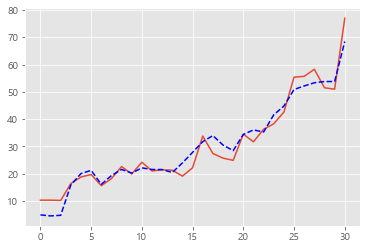

In [48]:
plt.plot( y_data)
plt.plot( model.predict(x_data) ,'b--')
plt.show()

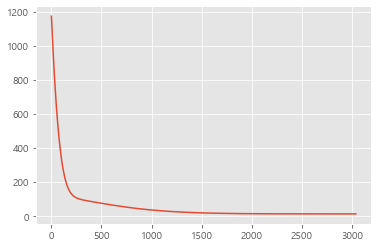

In [49]:
plt.plot(h.history['loss'])

In [51]:
model.predict(   scaler.transform([[8.8, 63], [10.5, 72]])        )

array([[ 4.7416353],
       [15.897381 ]], dtype=float32)

# 다중분류 _ iris  -> softmax

In [52]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [53]:
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df['species'] = iris['target']
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## 원 핫 인코딩


In [56]:
pd.get_dummies(df['species']).values

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

### pd.get_dummies
```
얘는 컬럼의 ordinal인경우 인식 제대로 못함.!

```

### TensorFlow에서 one-hot encoding

In [60]:
from tensorflow.keras.utils import to_categorical

In [57]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [61]:
to_categorical( iris['target'])

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## 텐서

In [62]:
x_data = df.iloc[:,:-1]
y_data = pd.get_dummies(df['species'])

In [63]:
x_data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [65]:
y_data.head(3)

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0


In [66]:
x_data.shape, y_data.shape

((150, 4), (150, 3))

In [67]:
# 텐서 노드

x = tf.constant(x_data, tf.float32)
y = tf.constant(y_data, tf.float32)

In [71]:
x_data.shape[1] == 4

True

In [72]:
# xavier, he  최적의 초기화 알고리즘 

initX = tf.initializers.GlorotUniform()
w = tf.Variable( initX(shape=[ x_data.shape[1], y_data.shape[1]] ) )    
b = tf.Variable( initX(shape=[ y_data.shape[1]] ) )  


In [74]:
# cost 함수
def compute_loss():
    z = tf.matmul(x,w) + b
#   hx = tf.nn.softmax(z)     ==> 아래 tf.nn.softmax_cross_entropy_with_logits에서 다 알아서 해줌
    cost_i = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=z)
    cost = tf.reduce_mean( cost_i )
    return cost

In [75]:
# 최적화
optimizer = Adam( 0.1 )
hist_cost = []

for i in range(1000):
    optimizer.minimize( compute_loss, var_list=[w,b] )
    c = compute_loss().numpy()
    hist_cost.append(c)
    print(i, 'cost:', c)

0 cost: 7.2723274
1 cost: 5.5693326
2 cost: 4.568197
3 cost: 4.2861867
4 cost: 3.7116094
5 cost: 2.8304164
6 cost: 1.8238258
7 cost: 1.0909528
8 cost: 1.1990672
9 cost: 1.6525103
10 cost: 1.8755798
11 cost: 1.8251119
12 cost: 1.6180241
13 cost: 1.4429324
14 cost: 1.4140397
15 cost: 1.4223176
16 cost: 1.3469194
17 cost: 1.1689543
18 cost: 0.9342806
19 cost: 0.7180523
20 cost: 0.59072286
21 cost: 0.57434165
22 cost: 0.6228845
23 cost: 0.6748319
24 cost: 0.6998669
25 cost: 0.6943017
26 cost: 0.665891
27 cost: 0.6275819
28 cost: 0.59277225
29 cost: 0.5664271
30 cost: 0.54250365
31 cost: 0.51277834
32 cost: 0.47691345
33 cost: 0.44494405
34 cost: 0.43004063
35 cost: 0.43539333
36 cost: 0.4488177
37 cost: 0.45403
38 cost: 0.44557586
39 cost: 0.43150935
40 cost: 0.42317572
41 cost: 0.42347676
42 cost: 0.42583382
43 cost: 0.42245138
44 cost: 0.41137573
45 cost: 0.39719772
46 cost: 0.3865162
47 cost: 0.38198903
48 cost: 0.38034734
49 cost: 0.3765275
50 cost: 0.3690878
51 cost: 0.36103916
52 cos

413 cost: 0.09742361
414 cost: 0.09727585
415 cost: 0.09712876
416 cost: 0.09698233
417 cost: 0.09683658
418 cost: 0.0966915
419 cost: 0.096547104
420 cost: 0.09640334
421 cost: 0.096260235
422 cost: 0.09611779
423 cost: 0.09597598
424 cost: 0.09583482
425 cost: 0.09569429
426 cost: 0.0955544
427 cost: 0.09541514
428 cost: 0.0952765
429 cost: 0.09513847
430 cost: 0.09500106
431 cost: 0.09486426
432 cost: 0.094728075
433 cost: 0.094592504
434 cost: 0.09445751
435 cost: 0.094323136
436 cost: 0.094189346
437 cost: 0.09405615
438 cost: 0.09392353
439 cost: 0.09379149
440 cost: 0.09366003
441 cost: 0.09352915
442 cost: 0.09339885
443 cost: 0.093269095
444 cost: 0.093139894
445 cost: 0.09301127
446 cost: 0.092883214
447 cost: 0.09275569
448 cost: 0.09262871
449 cost: 0.0925023
450 cost: 0.09237642
451 cost: 0.09225107
452 cost: 0.09212626
453 cost: 0.09200198
454 cost: 0.09187825
455 cost: 0.091755
456 cost: 0.091632314
457 cost: 0.091510154
458 cost: 0.091388464
459 cost: 0.09126733
460 cos

803 cost: 0.06725395
804 cost: 0.06721388
805 cost: 0.06717392
806 cost: 0.06713405
807 cost: 0.0670943
808 cost: 0.06705463
809 cost: 0.06701506
810 cost: 0.06697557
811 cost: 0.06693621
812 cost: 0.066896945
813 cost: 0.06685776
814 cost: 0.066818655
815 cost: 0.06677969
816 cost: 0.066740796
817 cost: 0.066702
818 cost: 0.066663295
819 cost: 0.06662468
820 cost: 0.06658617
821 cost: 0.06654775
822 cost: 0.06650944
823 cost: 0.06647121
824 cost: 0.066433065
825 cost: 0.06639501
826 cost: 0.066357054
827 cost: 0.06631918
828 cost: 0.066281416
829 cost: 0.06624374
830 cost: 0.066206135
831 cost: 0.06616864
832 cost: 0.066131234
833 cost: 0.066093914
834 cost: 0.066056676
835 cost: 0.06601953
836 cost: 0.06598249
837 cost: 0.06594553
838 cost: 0.06590865
839 cost: 0.06587184
840 cost: 0.06583515
841 cost: 0.06579854
842 cost: 0.06576202
843 cost: 0.065725595
844 cost: 0.06568923
845 cost: 0.06565296
846 cost: 0.06561678
847 cost: 0.06558067
848 cost: 0.06554467
849 cost: 0.065508746
850

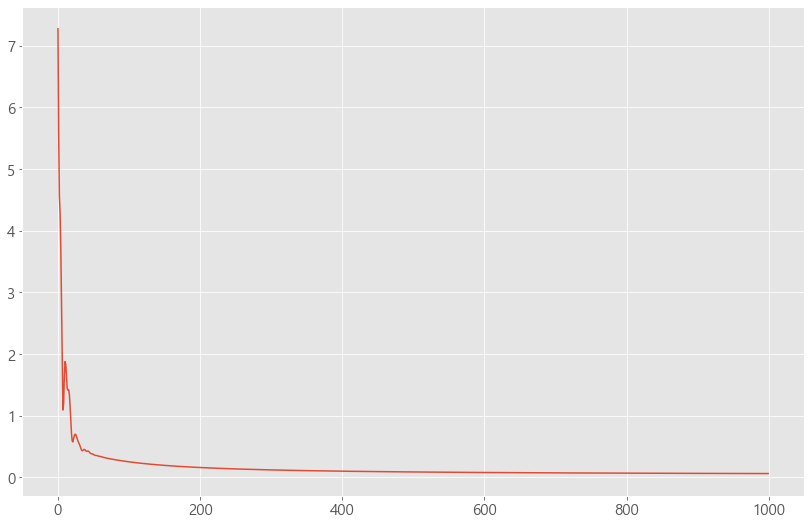

In [78]:
plt.plot(hist_cost)
plt.show()

In [81]:
w.numpy(),b.numpy()

(array([[ 1.7041659 ,  0.95029974, -1.3430365 ],
        [ 2.9639912 , -0.04631079, -3.3368547 ],
        [-3.5172443 , -0.2919438 ,  3.9009612 ],
        [-4.6589394 , -2.4407487 ,  5.5852003 ]], dtype=float32),
 array([ 2.30676  ,  4.94213  , -5.2344728], dtype=float32))

In [83]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0


In [82]:
# 예측

def hxfn( xdata):
    xd = tf.constant( xdata, tf.float32 )
    z = tf.matmul( xd, w ) + b
    hx = tf.nn.softmax( z )
    return hx.numpy()


# sepal길이 5.1, 넓이 3.5,   petal 길이 1.4, 넓이 0.2 인녀석 예측

hxfn( [[5.1, 3.5, 1.4, 0.2]])

# ->각각 0, 1 2 일  확률

array([[9.9887222e-01, 1.1278131e-03, 6.2779084e-15]], dtype=float32)

In [84]:
hxfn( [[5.1, 3.5, 1.4, 0.2]]).shape # 1행 3열

(1, 3)

In [85]:
# axis= 1  행 기준 가장 높은 값의 인덱스
hxfn( [[5.1, 3.5, 1.4, 0.2]]).argmax(axis=1)

array([0], dtype=int64)

In [88]:
# 전체 x데이터를 예측
hxfn(x_data)

array([[9.98872221e-01, 1.12781418e-03, 6.27790836e-15],
       [9.94120657e-01, 5.87929552e-03, 2.68307403e-13],
       [9.97279584e-01, 2.72043678e-03, 6.68702764e-14],
       [9.92480874e-01, 7.51910219e-03, 7.47235661e-13],
       [9.99099851e-01, 9.00203129e-04, 4.53532950e-15],
       [9.98893440e-01, 1.10655336e-03, 1.45392003e-14],
       [9.97231185e-01, 2.76881480e-03, 1.50429297e-13],
       [9.97733831e-01, 2.26616068e-03, 3.35326927e-14],
       [9.88484323e-01, 1.15157468e-02, 2.29878052e-12],
       [9.95182812e-01, 4.81716497e-03, 1.07826508e-13],
       [9.99319553e-01, 6.80476893e-04, 1.49926377e-15],
       [9.96367097e-01, 3.63285956e-03, 1.29335683e-13],
       [9.94917512e-01, 5.08251507e-03, 1.30743655e-13],
       [9.97178078e-01, 2.82192300e-03, 6.49520720e-14],
       [9.99922395e-01, 7.75690933e-05, 7.23357948e-18],
       [9.99897122e-01, 1.02887818e-04, 5.66780185e-17],
       [9.99695182e-01, 3.04809102e-04, 7.48540009e-16],
       [9.98592436e-01, 1.40750

In [91]:
# 전체 x데이터의 가장 높은 값(예측값)  을 변수로 지정
pred = hxfn( x_data).argmax(axis=1)

In [94]:
#  실제 y 값의 0 1 2 값 위치 
r = y_data.values.argmax(axis=1)

## 오차행렬

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
# 오차행렬
confusion_matrix(r, pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

## 정확도

In [99]:
from sklearn.metrics import accuracy_score
# 정확도
accuracy_score(r,pred)

0.98

## f1

### 다중분류 f1 구할떄는  f1(average='macro')써야해

In [101]:
# f1
from sklearn.metrics import f1_score 

f1_score(r,pred, average='macro')


0.97999799979998